In [1]:
unet_load_data = "/home/seam_team_six/code/model/unet-load-data.ipynb"
reload_data = "./unet-load-data.ipynb"
generate_model = "./unet-generate-model.ipynb"
generate_predictions = "./unet-generate-predictions.ipynb"
fit_model = "./unet-fit-model.ipynb"

In [2]:
import os

# Xrathus data path.
dataset_path = '/home/seam_team_six/data/npz original/'

data_path = os.path.join(dataset_path, 'data_train.npz')
labels_path = os.path.join(dataset_path, 'labels_train.npz')
#labels_path = './boundaries.npz'

In [3]:
# Model configuration
batch_size = 32
no_epochs = 20
learning_rate = 0.00003
#no_classes = 6
validation_split = 0.2
verbosity = 1
box_size = (64,64,64)
box_num = 100
test_size = 0.1
IMG_CHANNELS = 1
model_save_folder = "Training_"
histories = []
#nvidia-smi

In [9]:
%run "$unet_load_data"

Image Shape: (777, 590, 1006) -- Image Min/Max: (-5195.5234, 5151.7188)
Mask Shape: (777, 590, 1006) -- Mask Min/Max: (1.0, 6.0)
(700, 590, 1006)
Labels min: 0.0 -- Labels max: 5.0
Min data value (regular): -2332.821533203125 -- Max data value (regular): 2589.442626953125
Min data value (normalized): 0.0 -- Max data value (normalized): 1.0
Min data value (normalized): 0.0 -- Max data value (normalized): 1.0
[0, 1, 0, 0, 0, 0]
[2, 2, 2, 2, 1, 2]
[4, 4, 3, 4, 3, 3]
[5, 5, 5, 6, 5, 5]
[7, 7, 7, 7, 6, 7]
[9, 9, 8, 9, 8, 8]
[10, 11, 10, 10, 10, 10]
[11, 12, 12, 12, 12, 12]
[13, 14, 13, 14, 13, 14]
[15, 16, 15, 15, 15, 15]
[17, 17, 16, 17, 16, 17]


In [5]:
print("Input Data Length: " + str(len(input_data)))
print("Input Masks Length: " + str(len(input_masks)))

Input Data Length: 100
Input Masks Length: 100


In [6]:
# Add dimension to data and masks for convolutions.
input_data = [tf.expand_dims(x, axis=3) for x in input_data]
input_masks = [tf.expand_dims(x, axis=3) for x in input_masks]

In [7]:
%run "$generate_model"

SyntaxError: invalid syntax (<ipython-input-7-1588bd0e9b76>, line 90)

In [ ]:
histories.append(history)

In [ ]:
for passed_batch in range(3):
    %run "$reload_data"
    
    print("Input Data Length: " + str(len(input_data)))
    print("Input Masks Length: " + str(len(input_masks)))
    
    input_data = [tf.expand_dims(x, axis=3) for x in input_data]
    input_masks = [tf.expand_dims(x, axis=3) for x in input_masks]
    
    %run "$fit_model"
    histories.append(history)

In [ ]:
# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['sparse_categorical_accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Accuracy (validation data)')
#plt.plot(history.history['accuracy'], label='Accuracy (training data)')
#plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Image Shape: (777, 590, 1006) -- Image Min/Max: (-5195.5234, 5151.7188)
Mask Shape: (777, 590, 1006) -- Mask Min/Max: (1.0, 6.0)
(78, 100, 1006)
Labels min: 0.0 -- Labels max: 5.0
Min data value (regular): -1272.07470703125 -- Max data value (regular): 726.961181640625
Min data value (normalized): 0.0 -- Max data value (normalized): 1.0
Min data value (normalized): 0.0 -- Max data value (normalized): 1.0
(78, 100, 1006)
(64, 64, 960)
(64, 64, 960)
Samples in X, Y, Z: (1, 1, 15)
Shapes in X1, Y1, Z1: (64, 64, 64)
Total volume samples: 15
Data shape after slicing: (64, 64, 64)
Total volume samples (Similarity test): 15
15
(64, 64, 64, 1)
15
(64, 64, 64, 1)
15
(64, 64, 64, 6)
15
(64, 64, 64)
Samples in X, Y, Z: (1, 1, 15)
(64, 64, 960)
Shapes in X1, Y1, Z1: (64, 64, 64)
Data shape after merging: (64, 64, 960)


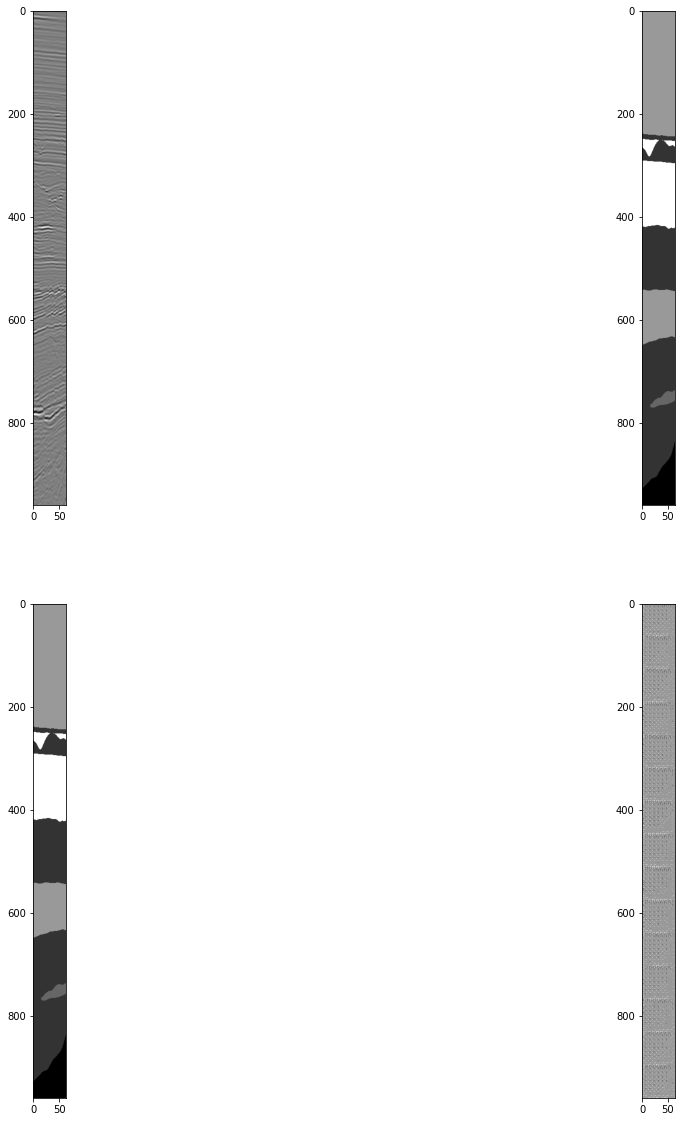

In [8]:
%run "$generate_predictions"

In [14]:
print(labels2[63,63,:])

[5. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 5. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 5. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4.
 5. 2. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 5. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 5. 2. 3. 3. 3. 3. 3. 3. 3.

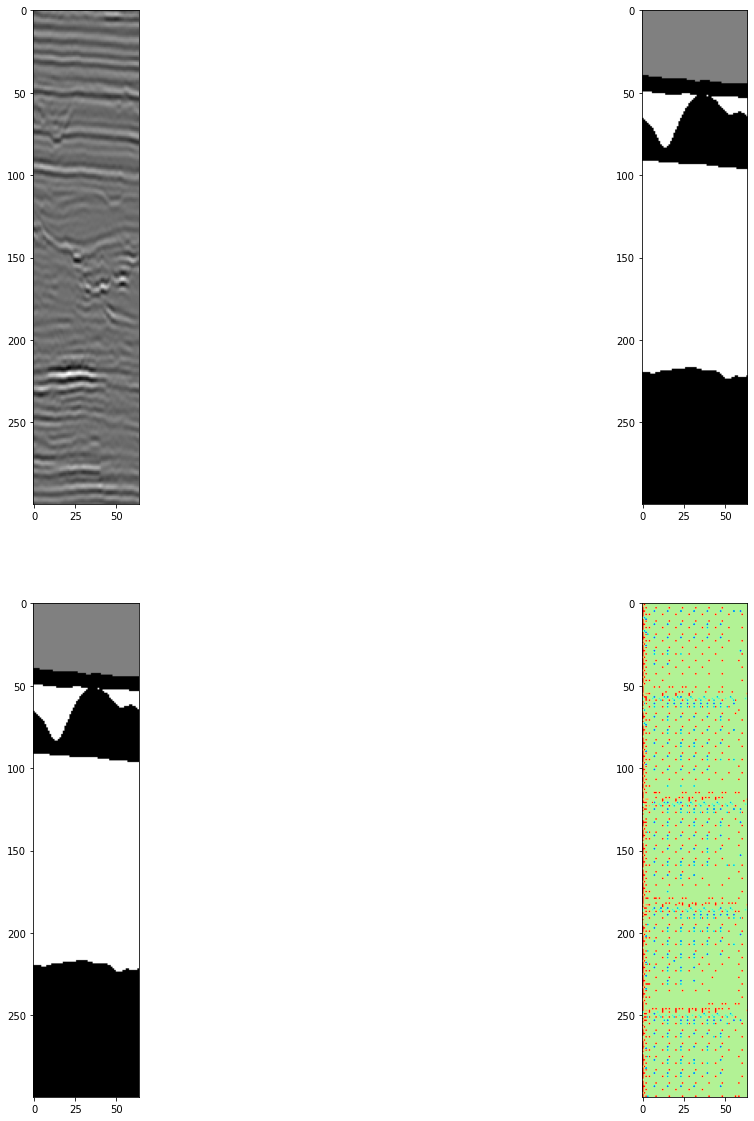

In [10]:
# Plot 2D slices.
image_slice = np.transpose(data,(2,0,1))[200:500,10,:200]
#image2_slice = np.transpose(data2,(2,0,1,3))[:,10,:,0]
mask_slice = np.transpose(labels,(2,0,1))[200:500,10,:200]
mask2_slice = np.transpose(labels2,(2,0,1))[200:500,10,:200]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
axs[0,0].imshow(image_slice, cmap='gray')
axs[0,1].imshow(mask_slice, cmap='gray')
axs[1,0].imshow(mask_slice, cmap='gray')
axs[1,1].imshow(mask2_slice, cmap='rainbow')

In [ ]:
print(labels2.min())

In [ ]:
print(predictions[0])

In [ ]:
image2_slice = np.transpose(data2,(2,0,1))[:,10,:]
mask2_slice = np.transpose(labels2,(2,0,1))[:,10,:]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
axs[0].imshow(image2_slice, cmap='gray')
axs[1].imshow(mask2_slice, cmap='gray')